## Laptop Price Predictor

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Load Data

In [2]:
# Reading data from local file

df = pd.read_csv('laptop_price.csv', encoding ='ISO-8859-1')

In [3]:
df.head()

,Un-named,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## 3. Data Preprocessing:

In [4]:
# checking dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Un-named          1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Checking duplicate values

df.duplicated().sum()

0

In [6]:
# Checking missing values

df.isna().sum()

Un-named            0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# removing 'laptop_ID' columns which is useless

df.drop(columns =['Un-named'], inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
# removing word 'GB' from 'Ram' & 'Kg' from 'Weight'

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
# converting type of Ram & Weight from 'object' to 'int'

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32') 


## 4. EDA:

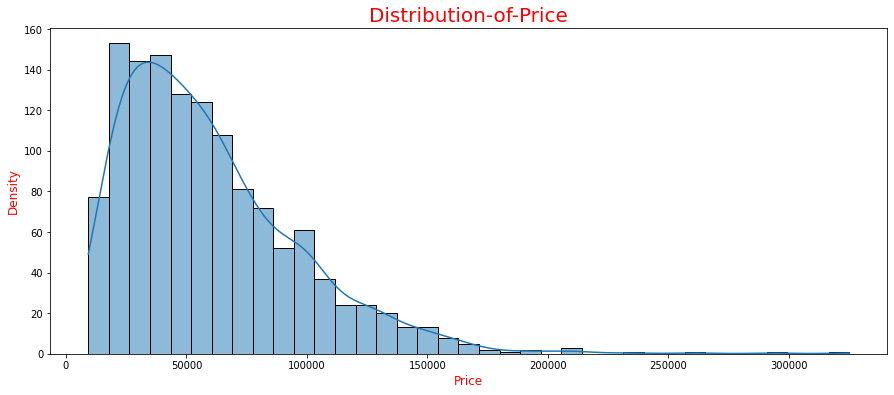

In [10]:
# Analysis on Price i.e distribution of price

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['Price'], kde=True, palette="crest")

plt.title(label="Distribution-of-Price", fontsize=20, color="red")
plt.xlabel("Price", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")

plt.show()

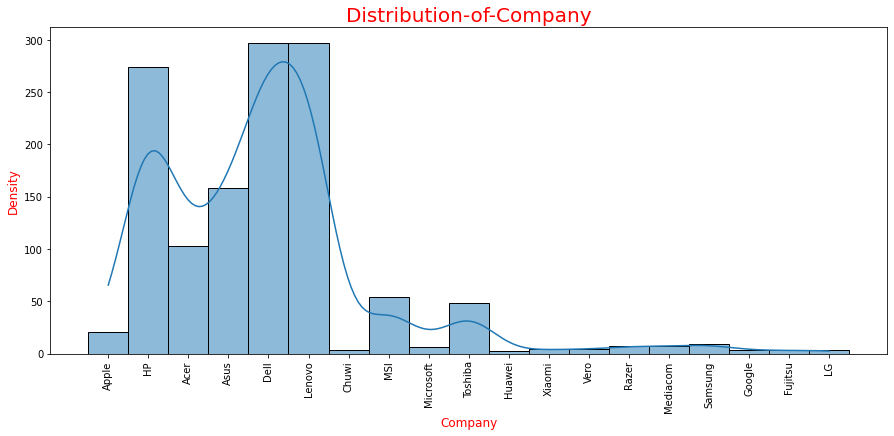

In [11]:
# Analysis on Company i.e distribution of Company

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['Company'], kde=True, palette="crest")

plt.title(label="Distribution-of-Company", fontsize=20, color="red")
plt.xlabel("Company", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

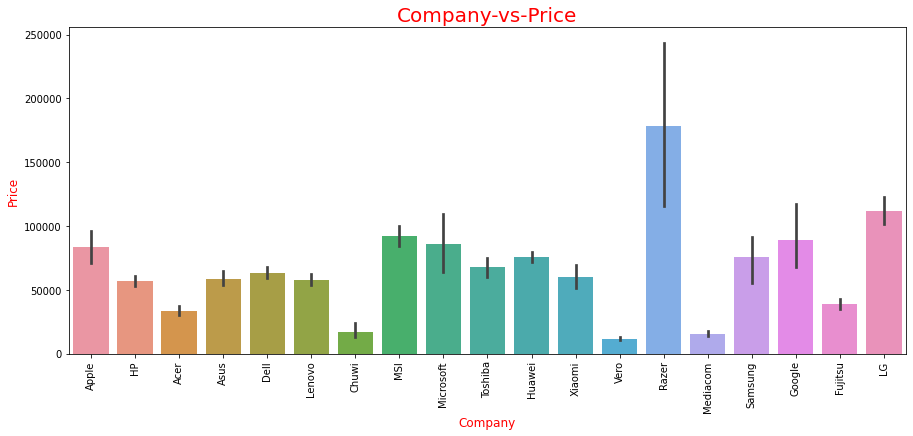

In [12]:
# Ploting company vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['Company'], y = df['Price'])

plt.title(label="Company-vs-Price", fontsize=20, color="red")
plt.xlabel("Company", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

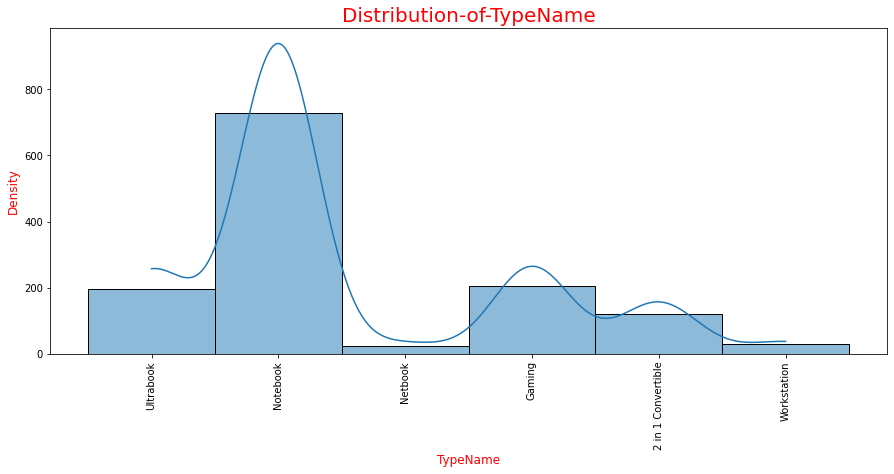

In [13]:
# Analysis on TypeName i.e distribution of TypeName

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['TypeName'], kde=True, palette="crest")

plt.title(label="Distribution-of-TypeName", fontsize=20, color="red")
plt.xlabel("TypeName", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

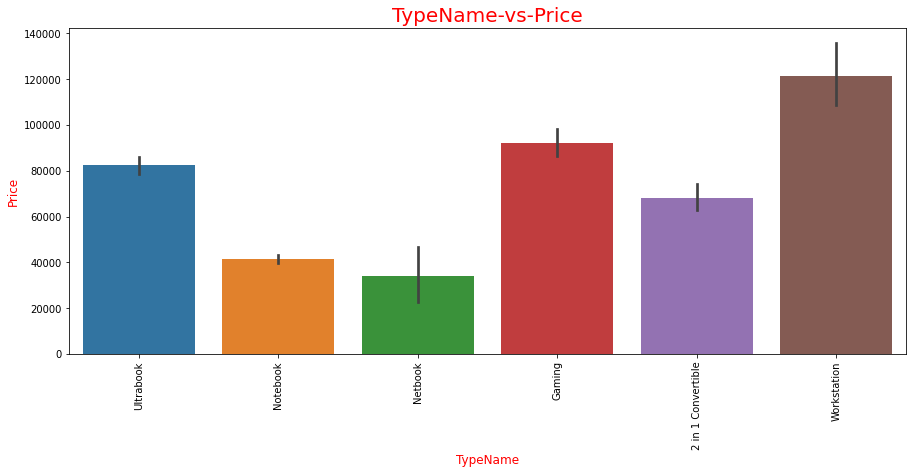

In [14]:
# Ploting TypeName vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['TypeName'], y = df['Price'])

plt.title(label="TypeName-vs-Price", fontsize=20, color="red")
plt.xlabel("TypeName", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

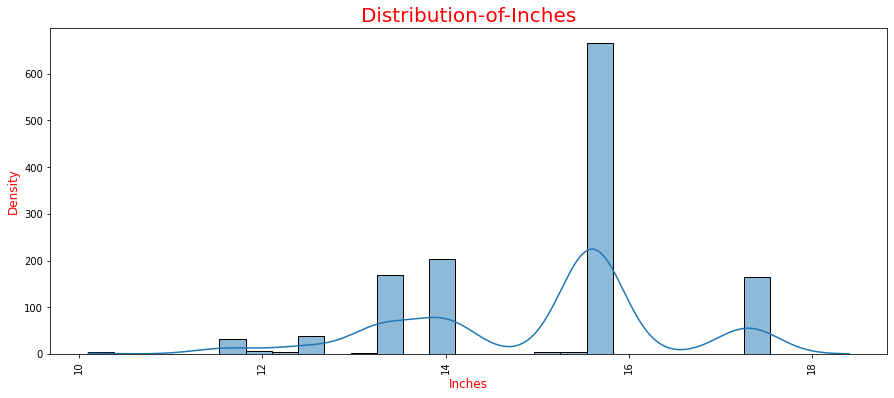

In [15]:
# Analysis on Inches i.e distribution of Inches

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['Inches'], kde=True, palette="crest")

plt.title(label="Distribution-of-Inches", fontsize=20, color="red")
plt.xlabel("Inches", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

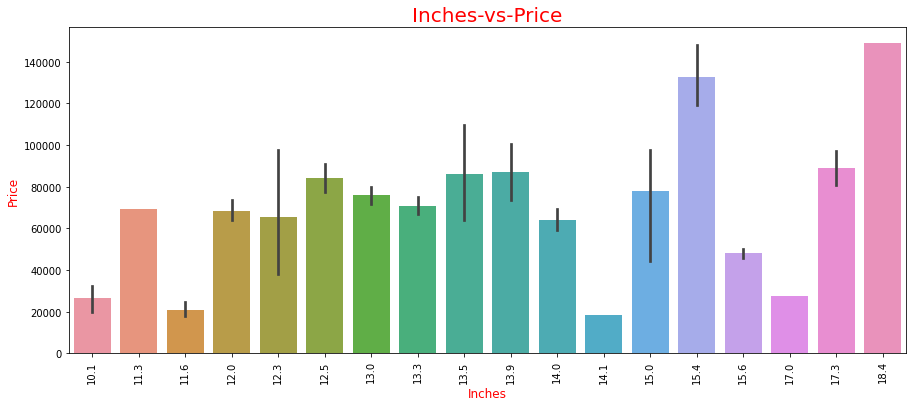

In [16]:
# Ploting Inches vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['Inches'], y = df['Price'])

plt.title(label="Inches-vs-Price", fontsize=20, color="red")
plt.xlabel("Inches", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

## 5. Feature Engineering:

In [17]:
# adding new column 'TouchScreen' wrt to 'ScrenResolution'

df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


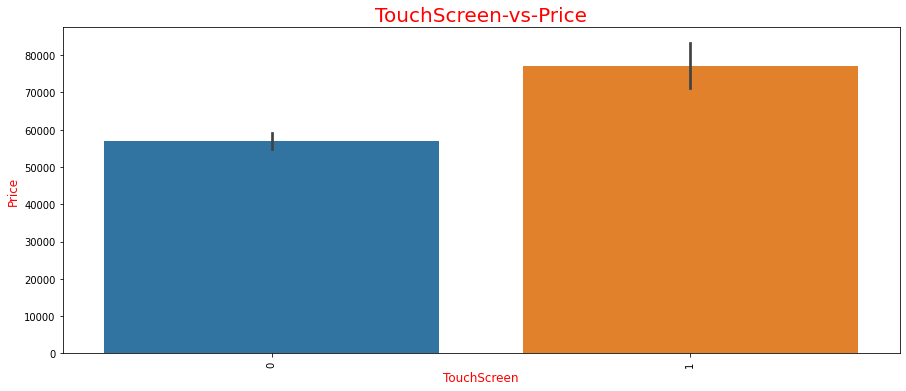

In [18]:
# Ploting TouchScreen vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['TouchScreen'], y = df['Price'])

plt.title(label="TouchScreen-vs-Price", fontsize=20, color="red")
plt.xlabel("TouchScreen", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

In [19]:
# adding new column 'Ips' from 'ScrenResolution'

df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


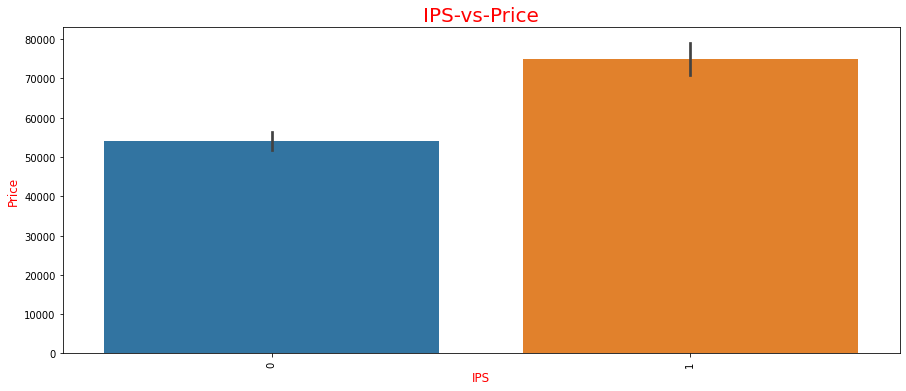

In [20]:
# Ploting Ips vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['Ips'], y = df['Price'])

plt.title(label="IPS-vs-Price", fontsize=20, color="red")
plt.xlabel("IPS", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

In [21]:
# adding new column 'X' from 'ScrenResolution'

df_temp = df['ScreenResolution'].str.split('x', n=1, expand=True)

df['X_res'] = df_temp[0] # pure/cleaned data
df['Y_res'] = df_temp[1] # impure/un-cleaned data
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [22]:
# We need to clean the "X_res" column using regular expresion

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

# converting dtype of X_res & Y-res into 'int32'
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [23]:
# adding new column 'PPI' from 'ScrenResolution'

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [24]:
# We hvae pull usefull information form "ScreenResolution" column such as Tocuhscree, X_res,Y-res, Ips, ppi
# therefore, we can drop "ScreenResolution" column

df.drop(columns=['ScreenResolution'], inplace = True) #coz we pull usefull info
df.drop(columns=['X_res', 'Y_res'], inplace = True) #coz we pull usefull info
df.drop(columns=['Inches'], inplace = True) #coz we pull usefull info
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


In [1]:
# The 'Cpu' columns also has some usefull information about processors & its type, 
# therfore we will pull usefull info into new columns 'CpuName'

# pulling 1st three words from 'Cpu' columns
df['CpuName'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.sample(20)

NameError: name 'df' is not defined

In [26]:
# The 'CpuName' columns also has some usefull information about processors brand 

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CpuBrand'] = df['CpuName'].apply(fetch_processor)

df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuName,CpuBrand
617,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.84,74005.92,0,0,141.211998,Intel Core i7,Intel Core i7
929,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,61218.72,0,0,111.935204,Intel Core i5,Intel Core i5


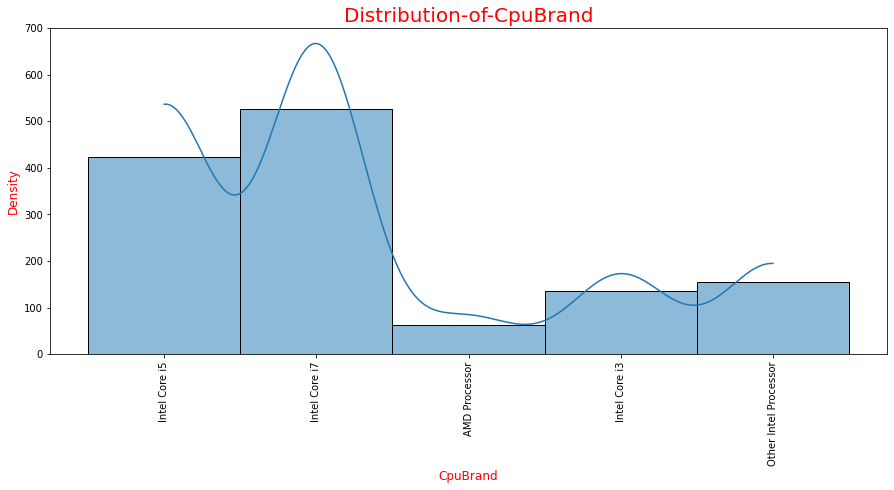

In [27]:
# Analysis on CpuBrand i.e distribution of CpuBrand

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['CpuBrand'], kde=True, palette="crest")

plt.title(label="Distribution-of-CpuBrand", fontsize=20, color="red")
plt.xlabel("CpuBrand", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

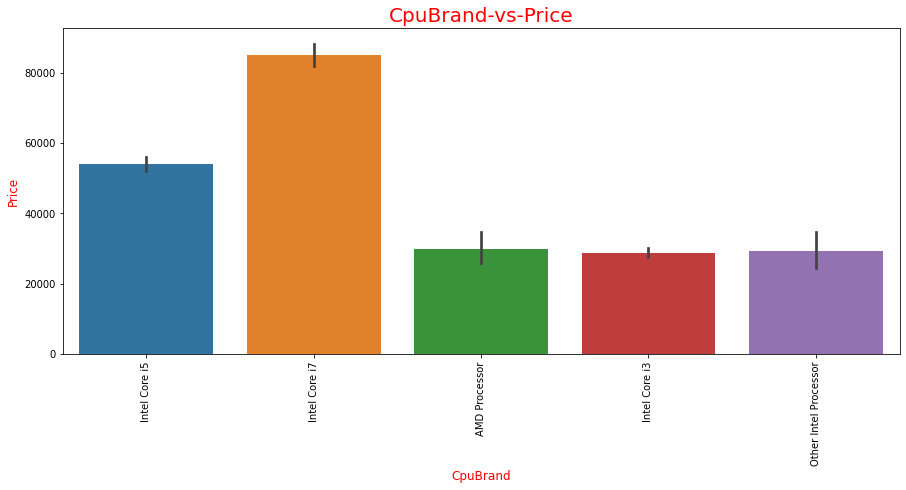

In [28]:
# Ploting CpuBrand vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['CpuBrand'], y = df['Price'])

plt.title(label="CpuBrand-vs-Price", fontsize=20, color="red")
plt.xlabel("CpuBrand", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

In [29]:
# Now, we pu;; usefull infomation from 'Cpu' & 'CpuName', so we drop them

df.drop(columns=['Cpu', 'CpuName'], inplace = True) #coz we pull usefull info
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuBrand
459,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.5,34093.872,0,0,106.113062,Intel Core i3
391,Asus,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.0,84768.480,0,0,127.335675,Intel Core i7


**`Focus on Ram`**

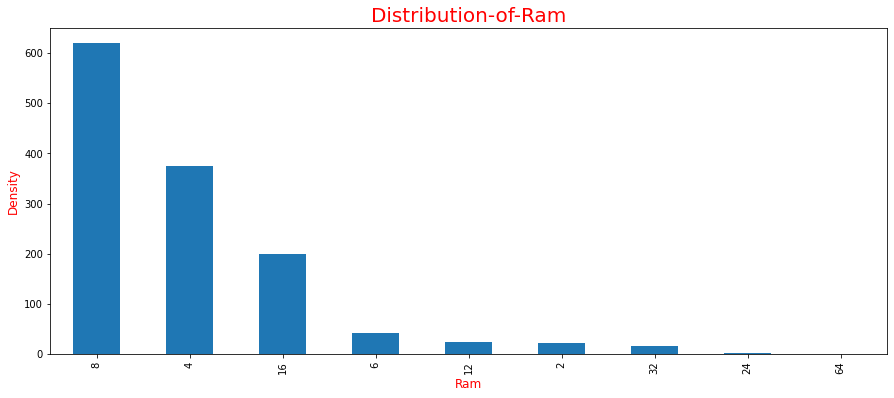

In [30]:
# Analysis on CpuBrand i.e distribution of CpuBrand

fig = plt.figure(figsize=(15, 6))

#sns.barplot(df['Ram'], kde=False, palette="crest")
df['Ram'].value_counts().plot(kind='bar')

plt.title(label="Distribution-of-Ram", fontsize=20, color="red")
plt.xlabel("Ram", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

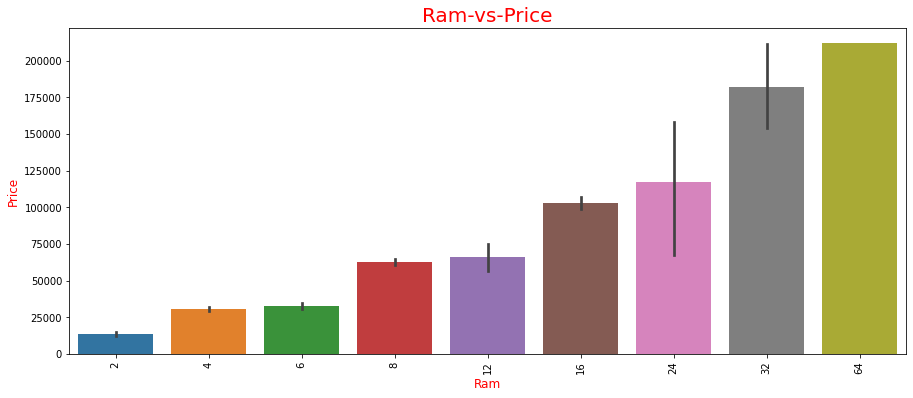

In [31]:
# Ploting Ram vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['Ram'], y = df['Price'])

plt.title(label="Ram-vs-Price", fontsize=20, color="red")
plt.xlabel("Ram", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

**`Focus on Memory`**

- The memory columns has much information which contains various categories of memory type, memory size, storage type
- Here, we will create 4 new columns as 'HDD','SDD','Hybrid', 'Flash_Storage'

In [32]:


df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\sachi\AppData\Local\Temp\ipykernel_5224\7795835.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\sachi\AppData\Local\Temp\ipykernel_5224\7795835.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [33]:
# We pull info from 'Memory', now we will drop it

df.drop(columns = ['Memory'], inplace = True)

df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
410,Lenovo,Workstation,8,Nvidia Quadro M1200,Windows 10,2.67,102564.0000,0,0,141.211998,Intel Core i7,0,512,0,0
198,HP,Gaming,16,Nvidia GeForce GTX 1050,Windows 10,3.35,73473.1200,0,1,127.335675,Intel Core i7,1000,256,0,0
516,HP,Notebook,4,Intel UHD Graphics 620,Windows 10,2.04,27783.9216,1,0,100.454670,Intel Core i5,1000,0,0,0
998,Asus,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.7200,0,0,141.211998,Intel Core i7,1000,256,0,0
164,Acer,Notebook,4,Intel HD Graphics 500,Windows 10,2.10,18541.4400,0,0,100.454670,Other Intel Processor,1000,0,0,0


In [34]:
# Ploting correlation of Price with all other parameter

df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [35]:
# Droping columns which has very low correlation with price

df.drop(columns = ['Hybrid', 'Flash_Storage'], inplace=True)
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


**`Focus on Gpu`**

- The **Cpu** columns has much information which contains various categories of graphics card brand, graphics card brand, etc
- Here, we will create 4 new columns as **'GpuBrand'** & will remove **'Gpu'**

In [36]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.drop(columns=['Gpu'], inplace = True)
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [37]:
# Checking type of 'GpuBrand' 
df['GpuBrand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GpuBrand, dtype: int64

In [38]:
# Removing 'GpuBrand' with name 'ARM'
df = df[df['GpuBrand'] !='ARM']
df['GpuBrand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GpuBrand, dtype: int64

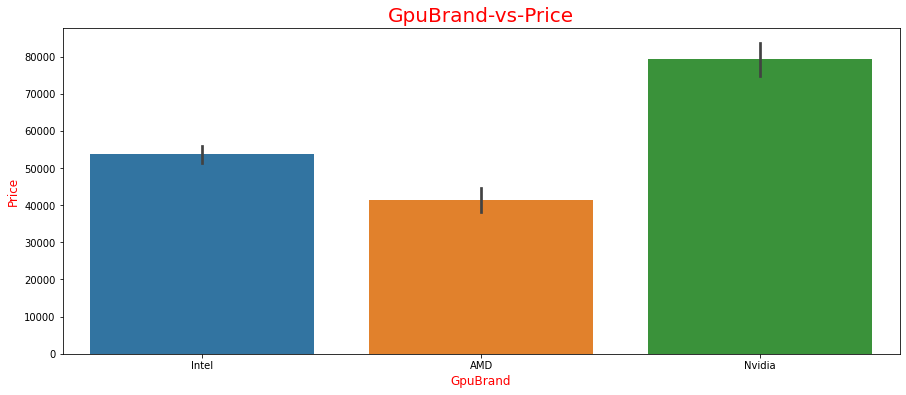

In [39]:
# Ploting GpuBrand vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['GpuBrand'], y = df['Price'])

plt.title(label="GpuBrand-vs-Price", fontsize=20, color="red")
plt.xlabel("GpuBrand", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
#plt.xticks(rotation='vertical')

plt.show()

**`Focus on OpSys`**

- We have a lots of categories here, we will similar categories like Windows-7,Windows-10, etc to Windows
- We will create three new column as "Windows", "Mac", "Others/No OS/Linux"

In [40]:
# First check categories of 'OpSys'

df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [41]:
# function to split different OpSys

def os_type(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [42]:
# Applying 'os_type' to column 'OpSys'

df['os'] = df['OpSys'].apply(os_type)
df.head()


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [43]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

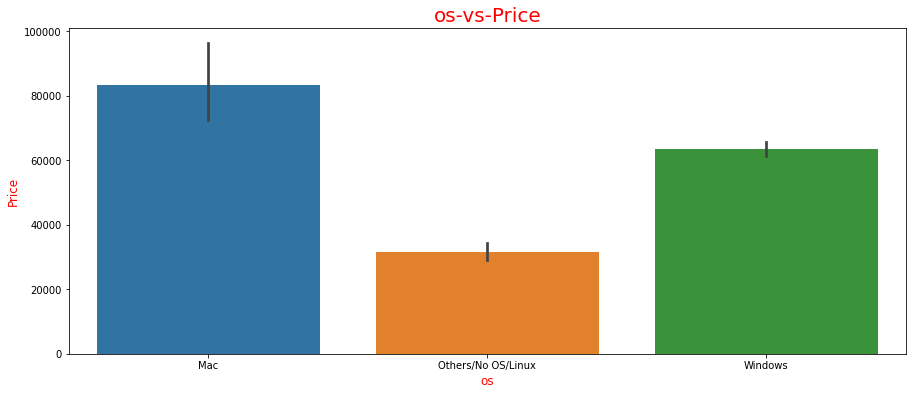

In [44]:
# Ploting OS vs price plot

snsfig = plt.figure(figsize=(15, 6))

sns.barplot(x = df['os'], y = df['Price'])

plt.title(label="os-vs-Price", fontsize=20, color="red")
plt.xlabel("os", fontsize=12, color="red")
plt.ylabel("Price", fontsize=12, color="red")
#plt.xticks(rotation='vertical')

plt.show()

In [45]:
# Ploting correlation with Price
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [46]:
# We pull usefull info from 'OpSys' column, therefore we will drip it
df.drop(columns = ['OpSys'], inplace = True)

df.sample(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
738,MSI,Gaming,16,1.80,111593.8944,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
633,Lenovo,Notebook,4,2.20,30849.1200,0,0,141.211998,Intel Core i3,1000,0,Nvidia,Windows
658,Lenovo,Gaming,8,3.31,63722.8800,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
109,Lenovo,Notebook,8,1.58,78854.4000,0,1,157.350512,Intel Core i7,0,256,Intel,Windows
764,Dell,Notebook,4,1.65,45234.7200,0,0,117.826530,Intel Core i3,500,0,Intel,Windows


**`Focus on Weight`**

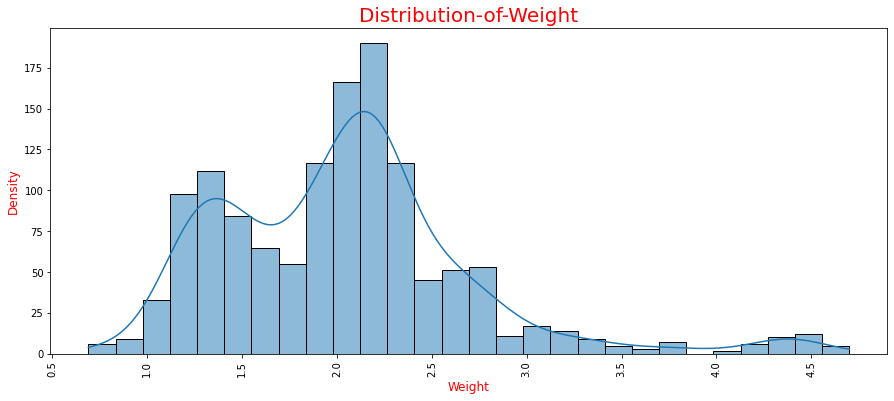

In [47]:
# Analysis on Weight i.e distribution of CpuBrand

fig = plt.figure(figsize=(15, 6))

sns.histplot(df['Weight'], kde=True, palette="crest")

plt.title(label="Distribution-of-Weight", fontsize=20, color="red")
plt.xlabel("Weight", fontsize=12, color="red")
plt.ylabel("Density", fontsize=12, color="red")
plt.xticks(rotation='vertical')

plt.show()

In [48]:
# Ploting correlation of Price with all other parameter

df.corr()['Price'] # only shows relation with columns whose values are numerical

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [49]:
# We pull usefull info from 'OpSys' column, therefore we will drip it
df.drop(columns = ['Weight'], inplace = True)

df.sample(5)

,Company,TypeName,Ram,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
1171,HP,Notebook,16,61751.5200,0,0,141.211998,Intel Core i7,0,512,Intel,Windows
1106,MSI,Gaming,8,80516.2032,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1114,Lenovo,2 in 1 Convertible,4,29250.7200,1,1,224.173809,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1117,Razer,Ultrabook,8,54825.1200,1,0,352.465147,Intel Core i7,0,256,Intel,Windows
1292,Dell,Notebook,2,20193.1200,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows


**`correlation Metrix`**

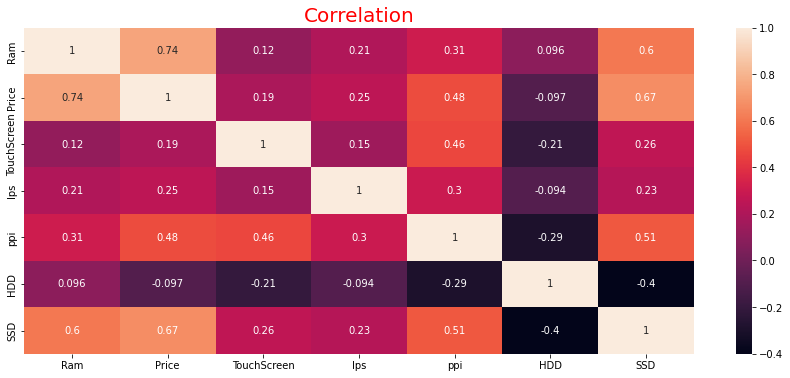

In [50]:
# Ploting correlation of Price with all other parameter

snsfig = plt.figure(figsize=(15, 6))

sns.heatmap(df.corr(), annot=True)

plt.title(label="Correlation", fontsize=20, color="Red")

plt.show()

**`Focsu on Price`**

- The **Price** column is skwed nature which can be tricky to handle by algorithms, therefore we will conver that into normal nature.
- This transformation will be applied at the time of seperating X, y variables (i.e. np.log(df['Price'])
- We will revert this function at the end when we are showing actual prices (i.e. np.exp(df['Price'])

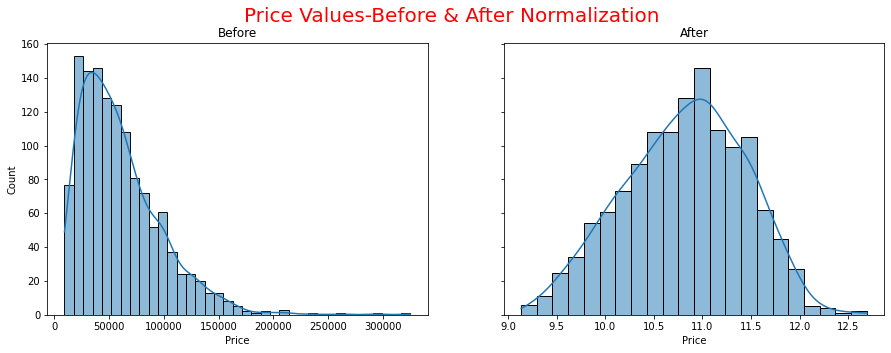

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Price Values-Before & After Normalization',fontsize=20, color="Red")

# Before
sns.histplot(df['Price'], ax=axes[0], kde=True)
axes[0].set_title('Before')

# After
sns.histplot(np.log(df['Price']), ax=axes[1], kde=True)
axes[1].set_title('After')

plt.show()

## 6. Feature Selection:

In [52]:
df

,Company,TypeName,Ram,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


- The various steps envolved in feature selection are as below:
    
    i) While developing the machine learning model, only a few variables in the dataset are useful for building the model, and the rest features are either redundant or irrelevant.
    
    ii) Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features."
    
    iii) Generates new variables by extracting them from the given dataset. 
    
    iv) Saving independentvariables in 'X', & saving dependentvariables in 'y',
    

In [53]:
# Selecting independent variables
X = df.drop(columns = ['Price'])

# Selecting dependent variables
y = np.log(df['Price'])  # taking log due to skwed nature of data

In [54]:
# checking independent variables
print(f"The 'X' values are : \n{X.head()}")

# checking dependent variables
print(f"\nThe 'y' values are : \n{y.head()}")

The 'X' values are : 
  Company   TypeName  Ram  TouchScreen  Ips         ppi       CpuBrand  HDD  \
0   Apple  Ultrabook    8            0    1  226.983005  Intel Core i5    0   
1   Apple  Ultrabook    8            0    0  127.677940  Intel Core i5    0   
2      HP   Notebook    8            0    0  141.211998  Intel Core i5    0   
3   Apple  Ultrabook   16            0    1  220.534624  Intel Core i7    0   
4   Apple  Ultrabook    8            0    1  226.983005  Intel Core i5    0   

   SSD GpuBrand                  os  
0  128    Intel                 Mac  
1    0    Intel                 Mac  
2  256    Intel  Others/No OS/Linux  
3  512      AMD                 Mac  
4  256    Intel                 Mac  

The 'y' values are : 
0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64


In [55]:
# checking shape of dependent variables
print(f"The 'X' shape is : \n{X.shape}")

# checking shape of dependent variables
print(f"\nThe 'y' shape is : \n{y.shape}")

The 'X' shape is : 
(1302, 11)

The 'y' shape is : 
(1302,)


In [56]:
# Spliting data into train & test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [57]:
# checking training set
print(f"The 'X_train' shape is : \n{X_train.shape}")
print(f"\nThe 'y_train' shape is : \n{y_train.shape}")

# checking test set
print(f"The 'X_test' shape is : \n{X_test.shape}")
print(f"\nThe 'y_test' shape is : \n{y_test.shape}")

The 'X_train' shape is : 
(1106, 11)

The 'y_train' shape is : 
(1106,)
The 'X_test' shape is : 
(196, 11)

The 'y_test' shape is : 
(196,)


## 7. Model building:

In [58]:
# Our X has categorical columns names such as 'company, TypeName, CpuBrand, GpuBrand, Os, 
# therefore we will use OneHotEncoding using column transformation along with scikit learn pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [59]:
# importing various alorithms to check result accuracy

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [60]:
df.head(1)

,Company,TypeName,Ram,Price,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


**`1. Linear Regression`**

In [61]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Linear Regresion Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

Linear Regresion Analysis: 
	R2 score: 0.8093042160388284
	MAE     : 0.20683136047796208


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`2. Ridge Regression`**

In [62]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Ridge Regresion Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

Ridge Regresion Analysis: 
	R2 score: 0.8158730152917324
	MAE     : 0.20400634278308988


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`3. Lasso Regression`**

In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Lasso Regresion Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

Lasso Regresion Analysis: 
	R2 score: 0.8089088592529363
	MAE     : 0.2076575898372656


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`4. KNN`**

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"KNN Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNN Analysis: 
	R2 score: 0.7929548001410286
	MAE     : 0.20316406003938095


**`5. Decision Tree`**

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Decision Tree Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

Decision Tree Analysis: 
	R2 score: 0.8250135839531518
	MAE     : 0.19738223288541784


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`6. SVM`**

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"SVM Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVM Analysis: 
	R2 score: 0.8028736420264553
	MAE     : 0.20402543460581696


**`7. Random Forest`**

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Random Forest Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Analysis: 
	R2 score: 0.879556334879635
	MAE     : 0.1680031445582329


**`8. ExtraTrees`**

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Extra Trees Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Extra Trees Analysis: 
	R2 score: 0.8539352420307742
	MAE     : 0.17633216679919966


**`9. AdaBoost`**

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"AdaBoost Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

AdaBoost Analysis: 
	R2 score: 0.8021740210326066
	MAE     : 0.2250388042901098


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`10. Gradient Boost`**

In [70]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Gradient Boost Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Gradient Boost Analysis: 
	R2 score: 0.8883117126376183
	MAE     : 0.16224710739592302


**`11. XgBoost`**

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"XgBoost Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

XgBoost Analysis: 
	R2 score: 0.8948996635200257
	MAE     : 0.1587613968257637


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**`12. Voting Regressor`**

In [72]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Voting Regressor Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Voting Regressor Analysis: 
	R2 score: 0.8837532521337014
	MAE     : 0.16427510317141883


**`13. Stacking`**

In [73]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Stacking Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Stacking Analysis: 
	R2 score: 0.8779111298201057
	MAE     : 0.17192401825464737


## 8. Model Selection:

- We apply the various model, and **Random Forest** giving the best performence.
- We will select a **Random Forest** for building model

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"Random Forest Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Analysis: 
	R2 score: 0.879556334879635
	MAE     : 0.1680031445582329


## 9. Model Prediction:

In [75]:
X_test.head(1)

,Company,TypeName,Ram,TouchScreen,Ips,ppi,CpuBrand,HDD,SSD,GpuBrand,os
248,HP,Notebook,4,0,1,165.632118,Intel Core i5,500,0,Intel,Windows


In [76]:
pipe.predict(X_test)

array([10.68214996,  9.7504392 ,  9.80089949, 10.19285113, 11.1205349 ,
       11.61471157, 10.08841909, 10.54774045, 11.09306433,  9.68574488,
       10.9931972 , 11.10674965, 11.54536958, 10.9848689 , 11.49200752,
       11.08903885, 10.99238656,  9.71616647, 11.38058859, 11.65135958,
       11.41226119, 11.26685938, 10.56354714, 11.09728242, 10.30501971,
       11.49976311, 10.97730917,  9.9770658 , 11.0190787 , 10.51088803,
       11.20006491, 10.12017334, 10.82023678, 10.9632712 , 11.02021124,
       10.77320603, 11.12744099, 11.0062694 , 11.42609953, 11.55732023,
       11.54536958, 11.28860773,  9.92884052,  9.78134632, 10.14192035,
        9.95034232, 10.86332023, 11.57439613, 11.3651681 , 11.10065923,
       11.55732023, 11.38058859,  9.97940732,  9.47097775, 10.43794953,
       10.85970856,  9.98013974, 11.08510552, 10.05153391, 10.45918126,
       10.98174017, 11.02021124,  9.43652585, 11.37617353, 10.96824116,
       10.74613446,  9.99838604, 11.23402973, 10.66722758,  9.82

In [77]:
output = pipe.predict([['HP','Notebook','4','0','1','165','Intel Core i5','500','0','Intel','Windows']])[0]

np.exp(output)

C:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


43571.12577649926

## 10. Pickle File Genearation:

In [78]:
import pickle

# using Random Forest model
# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))


# using Random Forest model
# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"XgBoost Analysis: ")
print(f"\tR2 score: {r2_score(y_test,y_pred)}")
print(f"\tMAE     : {mean_absolute_error(y_test,y_pred)}")

XgBoost Analysis: 
	R2 score: 0.8948996635200257
	MAE     : 0.1587613968257637


C:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
# using XGBoost model
pickle.dump(df,open('df_xgb.pkl','wb'))
pickle.dump(pipe,open('pipe_xgb.pkl','wb'))

In [81]:
# current version of sklearn & nltk

import nltk
import sklearn


print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# old versions
# The nltk version is 3.8.1.
# The scikit-learn version is 1.1.2.

# new versions
# The nltk version is 3.8.1.
# The scikit-learn version is 1.2.0

The nltk version is 3.8.1.
The scikit-learn version is 1.2.0.


In [82]:
import xgboost as xgb

xgb.__version__

'1.7.3'

In [83]:
#pip install xgboost==1.6.2

In [84]:
#!pip install xgboost

In [85]:
#! pip install xgboost --upgrade